In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [2]:
class Linear:
    def __init__(self):
        pass
        
    def fit(self, X, y):
        leftmat = np.linalg.inv(X.T @ X)
        self.betas = leftmat @ X.T @ y
    
    def predict(self, X):
        return X @ self.betas

In [3]:
train = pd.read_csv('train_cleaned.csv')

In [4]:
train.shape

(1456, 204)

In [5]:
x = train.values[:, :-2]
y = train.values[:, -2]
y = y.reshape((1456,1))
x = np.insert(x, 0, 1, axis=1)
x_just_for_col_name = train.loc[:,'2ndFlrSF_log':'SaleType_WD']

In [77]:
reg=Linear()

In [78]:
reg.fit(x,y)

In [79]:
reg.predict(x)

array([[11.85300267],
       [11.25170716],
       [12.26785403],
       ...,
       [14.60015805],
       [11.76664712],
       [12.70865401]])

In [80]:
np.sqrt(sum((reg.predict(x)-y)**2 )/len(y))

array([1.31623155])

In [81]:
reg.betas

array([[-7.29279777e+01],
       [ 2.58758549e-02],
       [ 1.78384844e+00],
       [ 1.28001205e+00],
       [-6.04201751e-02],
       [-5.39473949e-03],
       [-5.80059294e-02],
       [-2.32282486e-02],
       [-5.15113367e-02],
       [-3.65025672e-02],
       [-5.47670218e-01],
       [-1.59731004e-01],
       [ 8.96014513e-02],
       [ 1.63714910e-01],
       [-2.38895143e-02],
       [-7.76978475e-02],
       [ 1.18591883e-01],
       [-1.75736584e+00],
       [-1.05777783e-02],
       [ 1.55626079e-01],
       [ 3.56984320e-01],
       [-3.18444845e+00],
       [ 6.69052363e-02],
       [ 3.38553624e-01],
       [ 1.52080744e-02],
       [-6.37734590e-02],
       [ 1.52382123e-01],
       [ 1.29379713e-01],
       [ 8.45378278e-02],
       [-1.53137522e-01],
       [ 5.18617897e+00],
       [ 8.46331991e-01],
       [ 2.49168960e-01],
       [ 1.94976361e-01],
       [ 1.07915074e-02],
       [ 1.08895753e-01],
       [ 2.85706976e-01],
       [-2.12662378e-03],
       [-3.3

# Coef

In [94]:
coef = pd.Series(reg.betas[1:].reshape(-1), index = x_just_for_col_name.columns)

In [97]:
imp_coef

Exterior1st_CBlock      1.281774e+06
HasScreenPorch_log      3.764381e+01
PoolQC_log              1.784223e+01
Street_log              1.510937e+01
Has3SsnPorch_log        1.368670e+01
Condition2_RRAn         1.263930e+01
Condition2_RRNn         1.050334e+01
Condition2_PosA         1.037054e+01
Condition2_PosN         8.078362e+00
Condition2_RRAe         7.920573e+00
Condition2_Norm         7.670226e+00
Condition2_Feedr        7.362082e+00
KitchenAbvGr_log        5.186179e+00
ScreenPorch_log         5.012173e+00
PoolArea_log            2.115080e+00
3SsnPorch_log           1.783848e+00
Alley_log               1.280012e+00
BldgType_TwnhsE         8.610561e-01
LandSlope_log           8.463320e-01
BldgType_Twnhs          7.484556e-01
Exterior1st_BrkComm    -2.758116e-01
MiscFeature_Othr       -3.033207e-01
MiscFeature_TenC       -3.818625e-01
HasEnclosedPorch_log   -4.610629e-01
HasOpenPorch_log       -4.653875e-01
BsmtFinType2_log       -5.476702e-01
BldgType_Duplex        -7.777373e-01
E

In [95]:
imp_coef = pd.concat([coef.sort_values()[-1:-21:-1],coef.sort_values()[10::-1]])

Text(0.5,1,'Coefficients in the  Model')

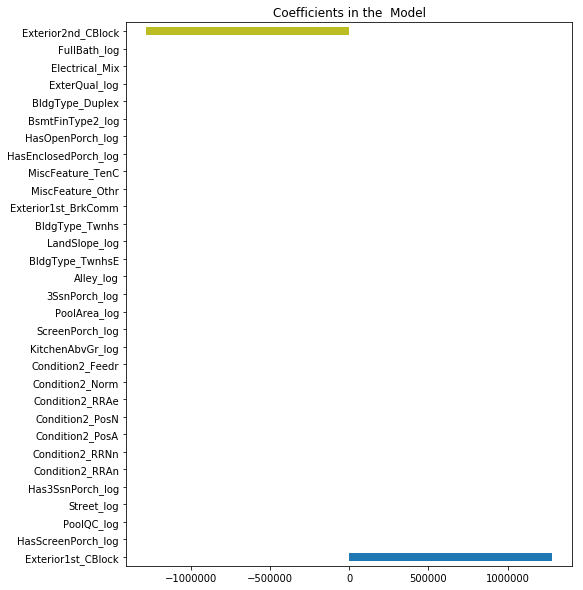

In [96]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the  Model")

# CV

In [84]:
splited_tranining_set_idx = np.load('splited_training_set.npy')
K = 4

In [85]:
CV_score = []
for i in range(K):
    current_train_idx = splited_tranining_set_idx[i][0]
    current_test_idx = splited_tranining_set_idx[i][1]
    X = x[current_train_idx]
    Y = y[current_train_idx]
    
    reg_cur = Linear()
    reg_cur.fit(X, Y)
    
    X_ = x[current_test_idx]
    Y_ = reg_cur.predict(X_)
    
    Y_real = y[current_test_idx]
    
    cuurent_score = np.sqrt(sum((Y_ - Y_real)**2)/len(Y_real))
    CV_score += [cuurent_score]

LinAlgError: Singular matrix

In [ ]:
CV_score

In [ ]:
np.mean(CV_score)

In [86]:
current_train_idx = splited_tranining_set_idx[0][0]
current_test_idx = splited_tranining_set_idx[0][1]

In [87]:
X = x[current_train_idx]
Y = y[current_train_idx]

In [88]:
reg_cur = Linear()
reg_cur.fit(X, Y)
Y_ = reg_cur.predict(X)

LinAlgError: Singular matrix

In [ ]:
Y_real = y[current_test_idx]